In [ ]:
#importing the essential libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_set1 = '/content/drive/MyDrive/Train_Test_Split/train_val'
test_set1 = '/content/drive/MyDrive/Train_Test_Split/test'

In [ ]:
train_datagen = image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)
test_datagen= image.ImageDataGenerator(    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_set1,
    target_size = (224,224),
    batch_size = 8,
    class_mode = 'binary')
test_generator = test_datagen.flow_from_directory(
    test_set1,
    target_size = (224,224),
    batch_size = 8,
    class_mode = 'binary')

Found 5178 images belonging to 2 classes.
Found 1365 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Normal': 0, 'OSCC': 1}

In [ ]:
base_for_model = tf.keras.applications.InceptionV3(weights='imagenet', input_shape=(224, 224, 3), include_top=False)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
for layer in base_for_model.layers:
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(base_for_model)
model.add(GaussianNoise(0.25)) #to prevent overfitting
model.add(GlobalAveragePooling2D()) #to converge and reduce the parameters
model.add(Dense(512, activation = 'relu')) #hidden layer (relu activation function is suggested for images)
model.add(BatchNormalization()) #to prevent overfitting
model.add(Dense(1, activation='sigmoid')) #output layer

In [ ]:
adam= tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam,loss= 'binary_crossentropy', metrics=['accuracy','Precision','Recall','AUC'])

In [ ]:
mp= tf.keras.callbacks.ModelCheckpoint(filepath='mymodel.keras',
                               verbose=2, save_best_only=True)
es= tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.05, patience=3)
callback=[es,mp]

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=80, #steps_per_epoch= training_images/batch_size= 4946/8<=618
    epochs = 6, #own choice
    validation_data = test_generator,
    validation_steps = 20,
    callbacks=callback
)

Epoch 1/6


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - AUC: 0.5959 - Precision: 0.5434 - Recall: 0.5722 - accuracy: 0.5488 - loss: 0.9320
Epoch 1: val_loss improved from inf to 0.95250, saving model to mymodel.keras
80/80 ━━━━━━━━━━━━━━━━━━━━ 362s 4s/step - AUC: 0.5961 - Precision: 0.5436 - Recall: 0.5723 - accuracy: 0.5491 - loss: 0.9310 - val_AUC: 0.5674 - val_Precision: 0.4909 - val_Recall: 0.7397 - val_accuracy: 0.5312 - val_loss: 0.9525
Epoch 2/6
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - AUC: 0.5419 - Precision: 0.5404 - Recall: 0.4958 - accuracy: 0.5374 - loss: 0.7600
Epoch 2: val_loss improved from 0.95250 to 0.79620, saving model to mymodel.keras
80/80 ━━━━━━━━━━━━━━━━━━━━ 268s 3s/step - AUC: 0.5426 - Precision: 0.5407 - Recall: 0.4962 - accuracy: 0.5378 - loss: 0.7595 - val_AUC: 0.6671 - val_Precision: 0.6364 - val_Recall: 0.2917 - val_accuracy: 0.6062 - val_loss: 0.7962
Epoch 3/6
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.6481 - Precision: 0.5983 - Recall: 0.5704 - accuracy: 0.6006 - loss

In [ ]:
print(history.history.keys())
import matplotlib.pyplot as plt
acc=(history.history['accuracy'])
loss=(history.history['loss'])
prc=(history.history['Precision'])
rec=(history.history['Recall'])
auc=(history.history['AUC'])
val_acc=(history.history['val_accuracy'])
val_loss=(history.history['val_loss'])
val_prc=(history.history['val_Precision'])
val_rec=(history.history['val_Recall'])
val_auc=(history.history['val_AUC'])

dict_keys(['AUC', 'Precision', 'Recall', 'accuracy', 'loss', 'val_AUC', 'val_Precision', 'val_Recall', 'val_accuracy', 'val_loss'])


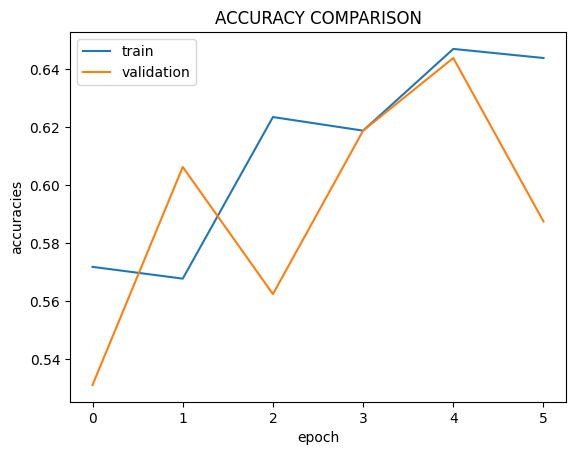

In [ ]:
plt.plot(acc)
plt.plot(val_acc)
plt.title('ACCURACY COMPARISON')
plt.xlabel('epoch')
plt.ylabel('accuracies')
plt.title('ACCURACY COMPARISON')
plt.legend(['train','validation'])

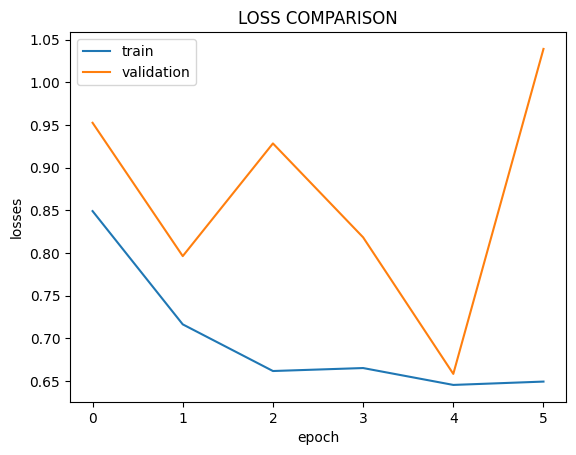

In [ ]:
plt.title('LOSS COMPARISON')
plt.plot(loss)
plt.plot(val_loss)
plt.xlabel('epoch')
plt.ylabel('losses')
plt.legend(['train','validation'])

In [ ]:
model.evaluate(test_generator)

171/171 ━━━━━━━━━━━━━━━━━━━━ 312s 2s/step - AUC: 0.6909 - Precision: 0.5129 - Recall: 1.0000 - accuracy: 0.5186 - loss: 1.1182


[1.1970300674438477,
 0.49743589758872986,
 0.4895833432674408,
 1.0,
 0.663632869720459]

In [ ]:
model.evaluate(train_generator)

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
predictions = model.predict(test_generator)
test_generator.classes
cm = confusion_matrix(test_generator.classes, predictions.round())

171/171 ━━━━━━━━━━━━━━━━━━━━ 205s 1s/step


<Axes: title={'center': 'InceptionV3'}>

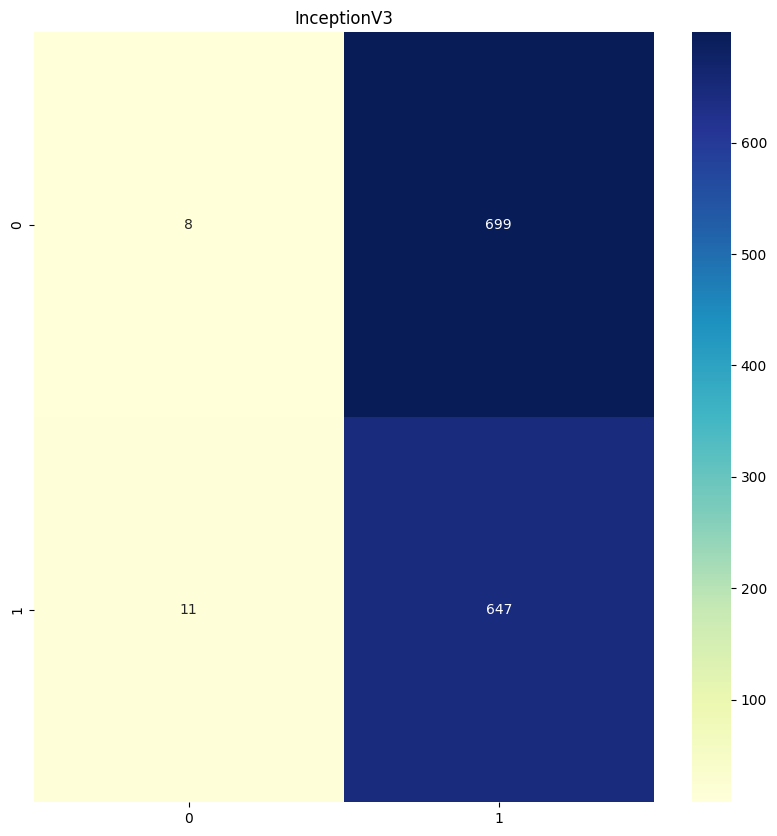

In [ ]:
plt.figure(figsize=(10,10))
plt.title('InceptionV3')
sns.heatmap(cm,  annot=True, fmt="d" ,cmap="YlGnBu")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_generator.classes, predictions.round())) #.argmax(axis=-1)

              precision    recall  f1-score   support

           0       0.42      0.01      0.02       707
           1       0.48      0.98      0.65       658

    accuracy                           0.48      1365
   macro avg       0.45      0.50      0.33      1365
weighted avg       0.45      0.48      0.32      1365

